In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.bedrooms.median()

3.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Identify categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Create a LabelEncoder object
le = LabelEncoder()

# Convert categorical columns to numerical using Label Encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Initialize and fit the Linear Regression model
reg = linear_model.LinearRegression()
reg.fit(df.drop('price', axis='columns'), df.price)

LinearRegression()

In [ ]:
reg.coef_

array([ 2.43906887e+02,  1.19474386e+05,  9.88888287e+05,  4.50391518e+05,
        4.23100741e+05,  2.98030507e+05,  3.57926360e+05,  8.72936027e+05,
        8.53633595e+05,  2.79785637e+05,  6.47055599e+05, -2.13187781e+05])

In [ ]:
reg.intercept_

101866.51305206865

Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old


[ ]


In [ ]:
# Assume 'feature1', 'feature2', ..., 'feature12' are the 12 features in your dataframe
# Replace with your actual feature names

# Example input data (replace with your actual values)
input_data = [[3000, 3, 40, 1, 0, 1, 0, 1, 0, 1, 0, 1]] # Assuming these align with your 12 features

# Make the prediction
prediction = reg.predict(input_data)
print(prediction)

[42435497.73373763]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

DATA VISUALIZATION


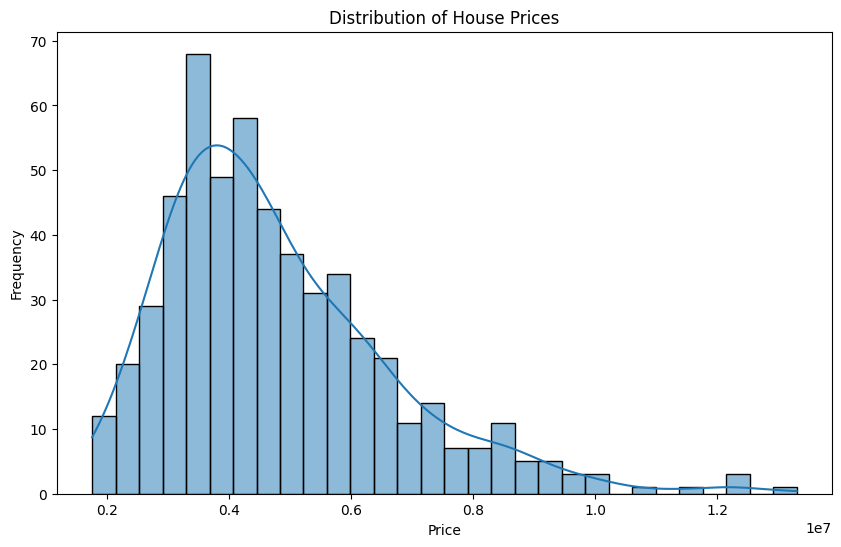

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Assuming you also want to use seaborn

# 1. Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

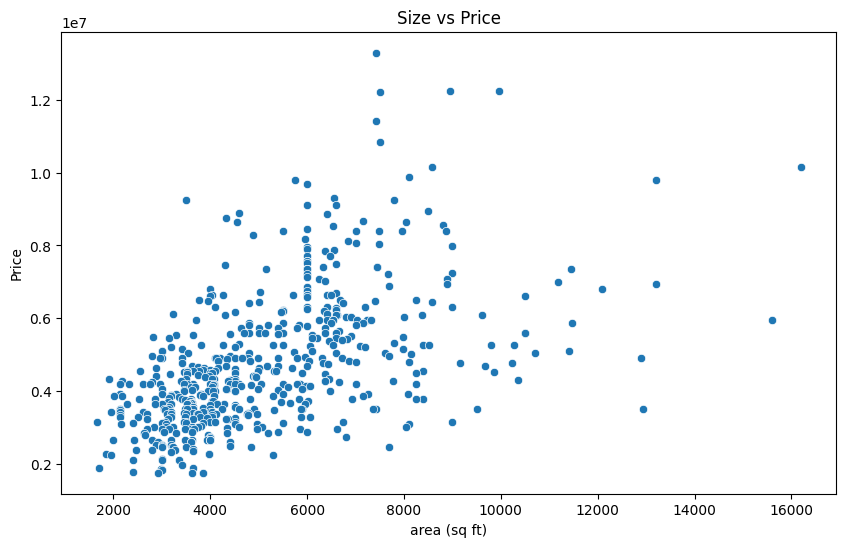

In [ ]:
# 2. Relationship Between Size and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df) # Use 'data=df' to specify the DataFrame
plt.title('Size vs Price')
plt.xlabel('area (sq ft)')
plt.ylabel('Price')
plt.show()

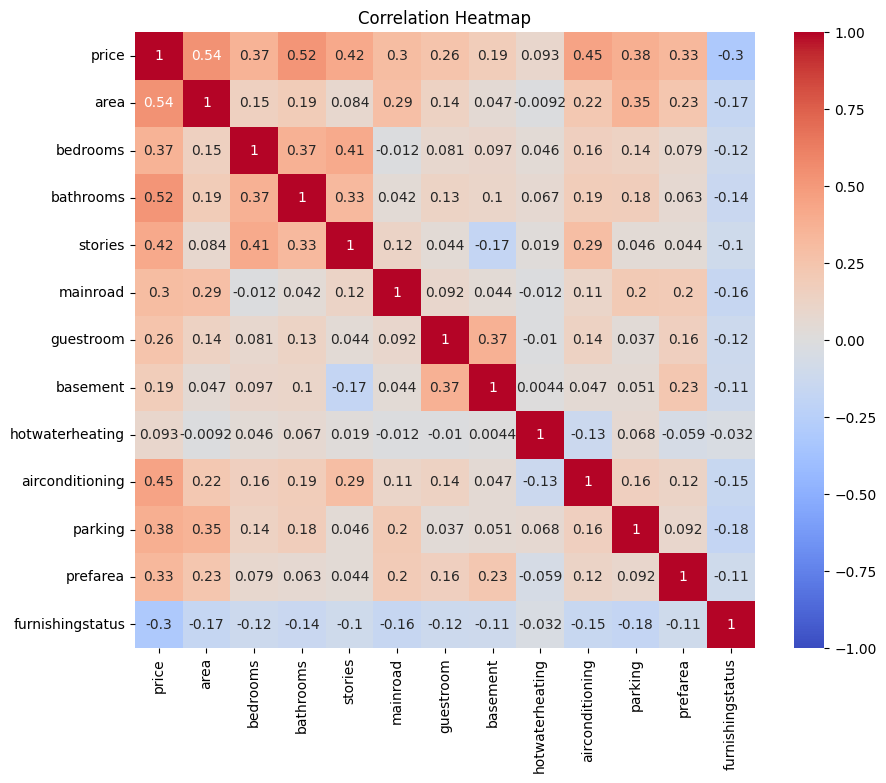

In [ ]:
# 4. Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()